This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

## for USGS

In [2]:
from dataretrieval import nwis
from IPython.display import display

## Regular usage

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [4]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [5]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [6]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package

#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader

In [7]:
import warnings

## Read Nc file downloaded from "GLADE" in Casper of NCAR HPC

In [8]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.mosart.h0.RIVER_DISCHARGE_OVER_LAND_LIQ.185001-185912.nc'
ncFile_disch = str(filePath) + '/' + str(fileName)
print(ncFile_disch)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.mosart.h0.RIVER_DISCHARGE_OVER_LAND_LIQ.185001-185912.nc


In [9]:
file_disch = Dataset(ncFile_disch, mode='r')
file_disch

lons = file_disch.variables['lon'][:]
lats = file_disch.variables['lat'][:]

In [10]:
print(lats[0:4])
print(lons[0:4])

[-89.75 -89.25 -88.75 -88.25]
[-179.75 -179.25 -178.75 -178.25]


In [11]:
file_xr  = xr.open_dataset(ncFile_disch) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                        (lon: 720, lat: 360, time: 120,
                                    hist_interval: 2)
Coordinates:
  * lon                            (lon) float64 -179.8 -179.2 ... 179.2 179.8
  * lat                            (lat) float64 -89.75 -89.25 ... 89.25 89.75
  * time                           (time) object 1850-02-01 00:00:00 ... 1860...
Dimensions without coordinates: hist_interval
Data variables: (12/13)
    mask                           (lat, lon) float64 ...
    area                           (lat, lon) float64 ...
    areatotal                      (lat, lon) float64 ...
    areatotal2                     (lat, lon) float64 ...
    mcdate                         (time) float64 ...
    mcsec                          (time) float64 ...
    ...                             ...
    mscur                          (time) float64 ...
    nstep                          (time) float64 ...
    time_bounds                    (time, hist_interval) object ...
    date_written                   (time) object ...
    time_written                   (time) object ...
    RIVER_DISCHARGE_OVER_LAND_LIQ  (time, lat, lon) float64 ...
Attributes: (12/13)
    title:              MOSART History file information
    comment:            NOTE: None of the variables are weighted by land frac...
    Conventions:        CF-1.0
    history:            created on 01/31/20 16:34:55
    source:             Model for Scale Adaptive River Transport MOSART1.0
    hostname:           aleph
    ...                 ...
    version:            cesm2.1.2-rc.03-18-g4ee0b23
    model_doi_url:      https://doi.org/10.5065/D67H1H0V
    case_title:         UNSET
    case_id:            b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    RTM_input_dataset:  MOSART_routing_Global_0.5x0.5_c170601.nc
    time_period_freq:   month_1

In [12]:
param_disch = file_xr['RIVER_DISCHARGE_OVER_LAND_LIQ']
print(param_disch.shape)
print(param_disch)

(120, 360, 720)
<xarray.DataArray 'RIVER_DISCHARGE_OVER_LAND_LIQ' (time: 120, lat: 360, lon: 720)>
[31104000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    long_name:     MOSART river basin flow: LIQ
    units:         m3/s
    cell_methods:  time: mean


## Setting US boundaries

In [13]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [-130 , -60]


In [14]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [15]:
param_disch_Sample_US = param_disch[:, latli:latui , lonli:lonui]
print(param_disch_Sample_US.shape)

(120, 60, 140)


In [16]:
lats_US = lats[latli:latui]
print(lats_US)

[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


In [17]:
lons_US = lons[lonli:lonui]
print(lons_US)

[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -69.25  -

## Using Monthly Data (Historical + Scen) for the US domain prepared from "GLADE" 

In [18]:
file_histSel_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMembers.npy'
file_histSel_Us_ensMem_loaded = np.load(file_histSel_Us_ensMem)
print(file_histSel_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMem_loaded)
maxVal

(1020, 60, 140, 50)


1e+36

In [19]:
file_scen_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMems.npy'
file_scen_Us_ensMem_loaded = np.load(file_scen_Us_ensMem)
print(file_scen_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMem_loaded)
maxVal

(1032, 60, 140, 50)


1e+36

## Concatenate the historical and scenario data arrays

In [20]:
print(file_histSel_Us_ensMem_loaded.shape)
print(file_scen_Us_ensMem_loaded.shape)


(1020, 60, 140, 50)
(1032, 60, 140, 50)


In [21]:
disch_histSel_scen_Us_ensMems = np.concatenate((file_histSel_Us_ensMem_loaded, file_scen_Us_ensMem_loaded), axis=0)
print(disch_histSel_scen_Us_ensMems.shape)

(2052, 60, 140, 50)


In [22]:
ens_size = disch_histSel_scen_Us_ensMems.shape[3]
print(ens_size)

50


## The four time (1971-2000, 2015-2044, 2045-2074, and 2075-2100) slots

In [23]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100

In [24]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

nMonsPerYr = 12     
print(nMonsPerYr)

171
12


### Coordinates at the outlet of the basins

In [25]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [26]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


In [27]:
print(disch_histSel_scen_Us_ensMems.shape)

(2052, 60, 140, 50)


## Extracting discharge values at different outlet points

### Missouri at Hermann

In [28]:
disch_histSel_scen_ensMems_MissouriHermann = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann, :]
print(disch_histSel_scen_ensMems_MissouriHermann.shape)

disch_histSel_scen_ensMean_MissouriHermann = np.nanmean(disch_histSel_scen_ensMems_MissouriHermann, axis =1)
print(disch_histSel_scen_ensMean_MissouriHermann.shape)

disch_histSel_scen_ensMean_Yr_MissouriHermann = np.reshape(disch_histSel_scen_ensMean_MissouriHermann,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)


(2052, 50)
(2052,)
(171, 12)


### Arkansas at Murray Dam near Little Rock

In [29]:
disch_histSel_scen_ensMems_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock, :]
print(disch_histSel_scen_ensMems_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_histSel_scen_ensMems_ArkansasMurrayLittleRock, axis =1)
print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock = np.reshape(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)


(2052, 50)
(2052,)
(171, 12)


### Ohio River at Olmsted

In [30]:
disch_histSel_scen_ensMems_OhioOlmsted = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted, :]
print(disch_histSel_scen_ensMems_OhioOlmsted.shape)

disch_histSel_scen_ensMean_OhioOlmsted = np.nanmean(disch_histSel_scen_ensMems_OhioOlmsted, axis =1)
print(disch_histSel_scen_ensMean_OhioOlmsted.shape)

disch_histSel_scen_ensMean_Yr_OhioOlmsted = np.reshape(disch_histSel_scen_ensMean_OhioOlmsted,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)


(2052, 50)
(2052,)
(171, 12)


### Mississippi at Vicksburg

In [31]:
disch_histSel_scen_ensMems_MissiVicks = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks, :]
print(disch_histSel_scen_ensMems_MissiVicks.shape)

disch_histSel_scen_ensMean_MissiVicks = np.nanmean(disch_histSel_scen_ensMems_MissiVicks, axis =1)
print(disch_histSel_scen_ensMean_MissiVicks.shape)

disch_histSel_scen_ensMean_Yr_MissiVicks=np.reshape(disch_histSel_scen_ensMean_MissiVicks,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)


(2052, 50)
(2052,)
(171, 12)


## Subsetting the data into different periods / Eras

## Reference Period

In [32]:

refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [33]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [34]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [35]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


## Missouri at Hermann

In [36]:
disch_yrMon_refPeriod_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissouriHermann.shape)

disch_yrMon_eraOne_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissouriHermann.shape)

disch_yrMon_eraTwo_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissouriHermann.shape)

disch_yrMon_eraThree_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissouriHermann.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [37]:

disch_monClim_refPeriod_ensMean_MissouriHermann = np.nanmean(disch_yrMon_refPeriod_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissouriHermann.shape)

disch_monClim_eraOne_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraOne_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraOne_ensMean_MissouriHermann.shape)

disch_monClim_eraTwo_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraTwo_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissouriHermann.shape)

disch_monClim_eraThree_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraThree_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraThree_ensMean_MissouriHermann.shape)


(12,)
(12,)
(12,)
(12,)


## Arkansas at Murray Dam near Little Rock

In [38]:
disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [39]:

disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock.shape)


(12,)
(12,)
(12,)
(12,)


## Ohio River at Olmsted

In [40]:
disch_yrMon_refPeriod_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_OhioOlmsted.shape)

disch_yrMon_eraOne_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_OhioOlmsted.shape)

disch_yrMon_eraTwo_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_OhioOlmsted.shape)

disch_yrMon_eraThree_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_OhioOlmsted.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [41]:

disch_monClim_refPeriod_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_refPeriod_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_refPeriod_ensMean_OhioOlmsted.shape)

disch_monClim_eraOne_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraOne_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraOne_ensMean_OhioOlmsted.shape)

disch_monClim_eraTwo_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraTwo_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraTwo_ensMean_OhioOlmsted.shape)

disch_monClim_eraThree_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraThree_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraThree_ensMean_OhioOlmsted.shape)


(12,)
(12,)
(12,)
(12,)


## Mississippi River at Vicksburg

In [42]:
disch_yrMon_refPeriod_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissiVicks.shape)

disch_yrMon_eraOne_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissiVicks.shape)

disch_yrMon_eraTwo_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissiVicks.shape)

disch_yrMon_eraThree_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissiVicks.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [43]:

disch_monClim_refPeriod_ensMean_MissiVicks = np.nanmean(disch_yrMon_refPeriod_ensMean_MissiVicks, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)

disch_monClim_eraOne_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraOne_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)

disch_monClim_eraTwo_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraTwo_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)

disch_monClim_eraThree_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraThree_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)


## Percent change relative to Historical Reference Period

### Missouri

In [44]:
print(disch_monClim_refPeriod_ensMean_MissouriHermann.shape)
print(disch_monClim_eraOne_ensMean_MissouriHermann.shape)
print(disch_monClim_eraTwo_ensMean_MissouriHermann.shape)
print(disch_monClim_eraThree_ensMean_MissouriHermann.shape)


(12,)
(12,)
(12,)
(12,)


In [45]:
disch_percCh_monClim_eraOne_ensMean_MissouriHermann = (disch_monClim_eraOne_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)
print('')
maxPercCh_eraOne_MissouriHermann = np.nanmax(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)
minPercCh_eraOne_MissouriHermann = np.nanmin(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)

print(maxPercCh_eraOne_MissouriHermann)
print(minPercCh_eraOne_MissouriHermann)


[ -3.9560132   -0.417961    -1.15300913  -7.97944646 -17.250192
  -8.67410436 -11.34635558  -6.98415717   2.72670338  -4.87869839
  -6.50506192  -4.87096468]

2.7267033785562953
-17.250192002390747


In [46]:
disch_percCh_monClim_eraTwo_ensMean_MissouriHermann = (disch_monClim_eraTwo_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)
print('')
maxPercCh_eraTwo_MissouriHermann = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)
minPercCh_eraTwo_MissouriHermann = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)

print(maxPercCh_eraTwo_MissouriHermann)
print(minPercCh_eraTwo_MissouriHermann)


[ -1.53073636   3.40801417   2.50231323 -13.31481706 -23.10998582
  -8.17363171  -9.64306489   0.86111037   5.77739201  -3.86231676
  -5.15846117  -2.35375092]

5.7773920108311625
-23.109985816251104


In [47]:
disch_percCh_monClim_eraThree_ensMean_MissouriHermann = (disch_monClim_eraThree_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)
print('')
maxPercCh_eraThree_MissouriHermann = np.nanmax(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)
minPercCh_eraThree_MissouriHermann = np.nanmin(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)

print(maxPercCh_eraThree_MissouriHermann)
print(minPercCh_eraThree_MissouriHermann)


[  6.94451647  11.65956682   7.97879895 -17.23161204 -21.24633013
  -3.95578247  -5.62943348  12.40307336  12.35464612   2.13658262
   1.24640085   4.98109927]

12.403073358506363
-21.246330134958168


## Arkansas

In [48]:
print(disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock.shape)

#print(dischObsMonClim_ArkansasMurrayLittleRock.shape)


(12,)
(12,)
(12,)
(12,)


In [49]:
disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraOne_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraOne_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraOne_ArkansasMurrayLittleRock)
print(minPercCh_eraOne_ArkansasMurrayLittleRock)


[-11.49216418 -11.97736554  -9.98536194  -7.89889002  -9.23815323
 -11.08472576 -13.99635743  -5.11053739  -9.22535311  -9.13998803
  -9.72323508 -10.18540267]

-5.110537394690868
-13.996357430838845


In [50]:
disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraTwo_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraTwo_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraTwo_ArkansasMurrayLittleRock)
print(minPercCh_eraTwo_ArkansasMurrayLittleRock)


[-8.30137916 -9.28372068 -6.97625281 -3.63233592 -2.73958852 -4.99698848
 -3.3356589   9.95245825 -5.45334534 -6.97978754 -7.38521515 -6.86680539]

9.952458254586812
-9.283720682872646


In [51]:
disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraThree_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraThree_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraThree_ArkansasMurrayLittleRock)
print(minPercCh_eraThree_ArkansasMurrayLittleRock)


[-5.64099235 -8.20085984 -4.81254191 -2.71485023  0.31271203 -1.73740213
  6.74263232 21.34070997 -1.34791811 -3.08541433 -3.99341723 -4.38766283]

21.340709968228925
-8.20085984380405


## Ohio at Olmsted

In [52]:
print(disch_monClim_refPeriod_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraOne_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraTwo_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraThree_ensMean_OhioOlmsted.shape)

#print(dischObsMonClim_OhioOlmsted.shape)


(12,)
(12,)
(12,)
(12,)


In [53]:
disch_percCh_monClim_eraOne_ensMean_OhioOlmsted = (disch_monClim_eraOne_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)
print('')
maxPercCh_eraOne_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)
minPercCh_eraOne_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)

print(maxPercCh_eraOne_OhioOlmsted)
print(minPercCh_eraOne_OhioOlmsted)


[  0.98803489   4.95630331   2.63986904 -10.02536309 -12.77004738
  -1.52932666  -4.35218889  -2.53076201   3.68515449  -0.27948304
  -1.0526196   -0.43685529]

4.956303306317254
-12.77004738269011


In [54]:
disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted = (disch_monClim_eraTwo_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)
print('')
maxPercCh_eraTwo_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)
minPercCh_eraTwo_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)

print(maxPercCh_eraTwo_OhioOlmsted)
print(minPercCh_eraTwo_OhioOlmsted)


[  6.42651044  11.0495541    6.1741391  -15.33830091 -14.5753278
   3.37563654   0.22389648   4.81890669   8.82415074   3.41605236
   3.07965817   5.01299587]

11.049554101120515
-15.338300914561056


In [55]:
disch_percCh_monClim_eraThree_ensMean_OhioOlmsted = (disch_monClim_eraThree_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)
print('')
maxPercCh_eraThree_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)
minPercCh_eraThree_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)

print(maxPercCh_eraThree_OhioOlmsted)
print(minPercCh_eraThree_OhioOlmsted)


[ 15.94681854  19.59890484  10.22997643 -18.50381673 -10.26554827
  10.18133929   6.00204428  14.31526995  15.24528095   9.61698851
  10.09664994  12.62668202]

19.59890483607522
-18.503816728958927


## Mississippi at Vicksburg

In [56]:
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)


In [57]:
disch_percCh_monClim_eraOne_ensMean_MissiVicks = (disch_monClim_eraOne_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraOne_ensMean_MissiVicks)
print('')
maxPercCh_eraOne_MissiVicks = np.nanmax(disch_percCh_monClim_eraOne_ensMean_MissiVicks)
minPercCh_eraOne_MissiVicks = np.nanmin(disch_percCh_monClim_eraOne_ensMean_MissiVicks)

print(maxPercCh_eraOne_MissiVicks)
print(minPercCh_eraOne_MissiVicks)


[ 1.17701093  3.36291611  0.16039276 -4.95232979 -5.51233409 -1.9810531
 -3.22442087 -0.06497738  0.32976214 -0.39469904 -1.41969194 -0.70701853]

3.3629161136960026
-5.512334086636112


In [58]:
disch_percCh_monClim_eraTwo_ensMean_MissiVicks = (disch_monClim_eraTwo_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)
print('')
maxPercCh_eraTwo_MissiVicks = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)
minPercCh_eraTwo_MissiVicks = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)

print(maxPercCh_eraTwo_MissiVicks)
print(minPercCh_eraTwo_MissiVicks)


[10.78999696 11.39532956  6.19920727 -2.39393841 -2.38357152  2.98921019
  1.97375009  6.64793548  5.09798928  2.71931027  3.50880423  6.75728255]

11.395329558359922
-2.393938406850445


In [59]:
disch_percCh_monClim_eraThree_ensMean_MissiVicks = (disch_monClim_eraThree_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraThree_ensMean_MissiVicks)
print('')
maxPercCh_eraThree_MissiVicks = np.nanmax(disch_percCh_monClim_eraThree_ensMean_MissiVicks)
minPercCh_eraThree_MissiVicks = np.nanmin(disch_percCh_monClim_eraThree_ensMean_MissiVicks)

print(maxPercCh_eraThree_MissiVicks)
print(minPercCh_eraThree_MissiVicks)


[20.53875796 20.3039239  11.82348753  0.47528169  3.53501498  8.26103792
  7.84807558 15.55369153 10.83309111  7.90833843  9.59293741 14.70533676]

20.538757958170184
0.4752816939895204


## Plotting the percent change discharge climatology relative to Historical Referenc period climatology

In [60]:
monsStr = 'Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'
print(monsStr)

('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')


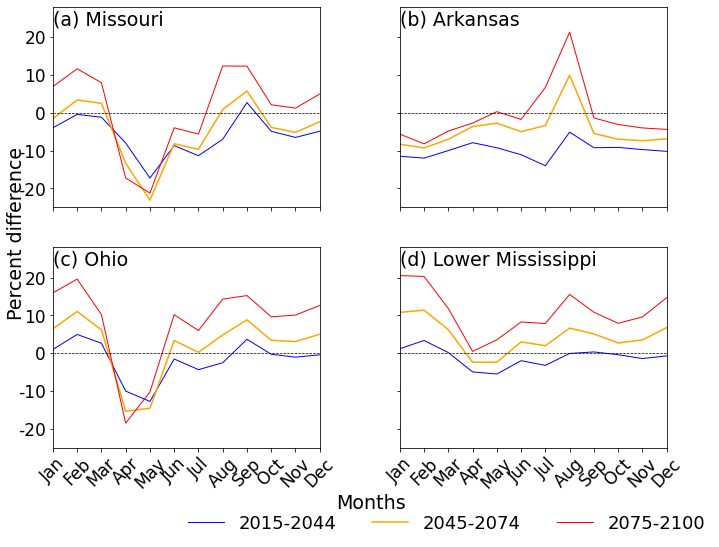

In [61]:

#%matplotlib notebook


tickFontSize = 17
textFontSize = 19
legendFontSize = 18
titleFontSize = 19


linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(11, 9), constrained_layout=False)

axs = [plt.subplot(2, 2, x + 1,) for x in range(4)]
ax1 = axs[0]

ln12=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_MissouriHermann, label="2015-2044", color = 'blue', linewidth=1)
ln13=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_MissouriHermann, label="2045-2074", color = 'orange', linewidth=1.5)
ln14=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_MissouriHermann, label="2075-2100", color = 'red', linewidth=1)
ln16 = ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax1.set_title('(a) Missouri', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax1.set_xticks(range(nMonsPerYr))
ax1.set_xticklabels(monsStr, minor=False)
ax1.set_xticklabels('', )

ax1.set_yticks([-20, -10, 0, 10, 20]) 
ax1.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 


ax1.set_xlim([0, 11])
ax1.set_ylim([-25, 28])

ax1.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln22=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock, label="2015-2044", color = 'blue', linewidth=1)
ln23=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock, label="2045-2074", color = 'orange', linewidth=1.5)
ln24=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock, label="2075-2100", color = 'red', linewidth=1)
ln26 = ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax2.set_xticks(range(nMonsPerYr))
ax2.set_xticklabels(monsStr, minor=False)
ax2.set_xticklabels('', )

ax2.set_yticks([-20, -10, 0, 10, 20]) 
ax2.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 
ax2.set_yticklabels('', )

ax2.set_xlim([0, 11])
ax2.set_ylim([-25, 28])

ax2.set_xlabel('')
ax2.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ln32=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_OhioOlmsted, label="2015-2044", color = 'blue', linewidth=1)
ln33=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted, label="2045-2074", color = 'orange', linewidth=1.5)
ln34=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_OhioOlmsted, label="2075-2100", color = 'red', linewidth=1)
ln36 = ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize =  titleFontSize, loc='left')

ax3.set_xticks(range(nMonsPerYr))
ax3.set_xticklabels(monsStr, minor=False)
ax3.set_xticklabels(monsStr, minor=False, rotation = 45,  fontsize = tickFontSize)

ax3.set_yticks([-20, -10, 0, 10, 20]) 
ax3.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 


ax3.set_xlim([0, 11])
ax3.set_ylim([-25, 28])

ax3.set_ylabel('Percent difference', fontsize = textFontSize )
ax3.yaxis.set_label_coords(-0.10, +1.07)

ax3.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
ln42=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_MissiVicks, label="2015-2044", color = 'blue', linewidth=1)
ln43=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_MissiVicks, label="2045-2074", color = 'orange', linewidth=1.5)
ln44=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_MissiVicks, label="2075-2100", color = 'red', linewidth=1)
ln46 = ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax4.set_title('(d) Lower Mississippi', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax4.set_xticks(range(nMonsPerYr))
ax4.set_xticklabels(monsStr, minor=False, rotation = 45,  fontsize = tickFontSize)

ax4.set_yticks([-20, -10, 0, 10, 20]) 
ax4.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 
ax4.set_yticklabels('', )

ax4.set_xlim([0, 11])
ax4.set_ylim([-25, 28])

ax4.set_xlabel('Months', fontsize = textFontSize )
ax4.xaxis.set_label_coords(-0.11, -0.23)
ax4.legend(ncol=3, loc=(-0.82, -0.46),frameon=False, fontsize=legendFontSize)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#st = fig.suptitle("Annual cycle at a gage-station per basin", fontsize = 20)
#st.set_y(0.92)
#st.set_x(0.515)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.subplots_adjust(wspace=0.3, bottom=0.2)

plt.show()

In [62]:
STOP here ============

SyntaxError: invalid syntax (<ipython-input-62-76345b92dc7b>, line 1)